
# [作業目標]

 *   使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
 *  觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]

 *   仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
 *   繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'E:\\python\\ML-day100\\data\\'


In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:

# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [5]:
app_train['DAYS_BIRTH_YEAR_DISCRETE']= pd.cut(app_train['DAYS_BIRTH']/365,12)
app_train['DAYS_BIRTH_YEAR_DISCRETE'].value_counts()

(36.719, 40.769]    35683
(40.769, 44.819]    33330
(28.618, 32.668]    32149
(32.668, 36.719]    31795
(44.819, 48.869]    28985
(52.92, 56.97]      28805
(48.869, 52.92]     26895
(56.97, 61.02]      26229
(24.568, 28.618]    23975
(61.02, 65.07]      21487
(20.469, 24.568]    10412
(65.07, 69.121]      7766
Name: DAYS_BIRTH_YEAR_DISCRETE, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

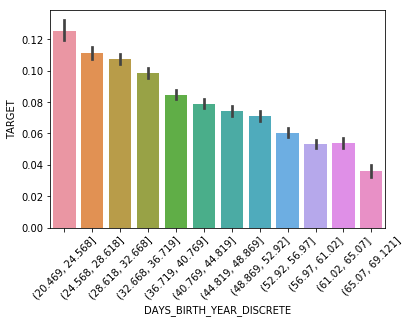

In [6]:
import seaborn as sns
sns.barplot(app_train['DAYS_BIRTH_YEAR_DISCRETE'],app_train['TARGET'])
plt.xticks(rotation=45)

In [7]:
app_train['DAYS_EMPLOYED']= abs(app_train['DAYS_EMPLOYED'])
app_train['DAYS_EMPLOYED_Years_DISCRETE']= pd.cut(app_train['DAYS_EMPLOYED']/365,6)
app_train['DAYS_EMPLOYED_Years_DISCRETE'].value_counts()

(-0.0491, 8.179]    182847
(8.179, 16.358]      49515
(16.358, 24.537]     13095
(24.537, 32.716]      4837
(32.716, 40.895]      1663
(40.895, 49.074]       180
Name: DAYS_EMPLOYED_Years_DISCRETE, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

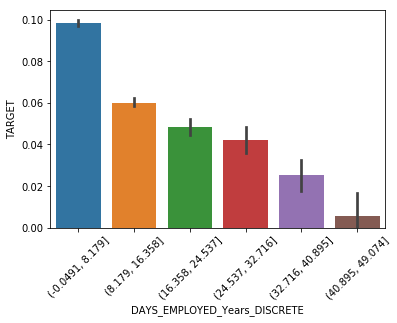

In [8]:
sns.barplot(app_train['DAYS_EMPLOYED_Years_DISCRETE'],app_train['TARGET'])
plt.xticks(rotation=45)
